In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
smokingDf = pd.read_csv("smoking.csv/smoking.csv")
smokingDf.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [43]:
#Removing ID  columns as it is not needed. Oral value is Y for all
smokingDf.drop(['ID'],axis=1,inplace=True)
smokingDf.iloc[1]

gender                     F
age                       40
height(cm)               160
weight(kg)                60
waist(cm)               81.0
eyesight(left)           0.8
eyesight(right)          0.6
hearing(left)            1.0
hearing(right)           1.0
systolic               119.0
relaxation              70.0
fasting blood sugar    130.0
Cholesterol            192.0
triglyceride           115.0
HDL                     42.0
LDL                    127.0
hemoglobin              12.7
Urine protein            1.0
serum creatinine         0.6
AST                     22.0
ALT                     19.0
Gtp                     18.0
oral                       Y
dental caries              0
tartar                     Y
smoking                    0
Name: 1, dtype: object

In [44]:
smokingDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

## We will perform some EDA on this dataset to find some patterns

### Let's first see if there are any Na columns in any dataset

#### We see that none of the rows have Na values


In [45]:
smokingDf.isna().any()

gender                 False
age                    False
height(cm)             False
weight(kg)             False
waist(cm)              False
eyesight(left)         False
eyesight(right)        False
hearing(left)          False
hearing(right)         False
systolic               False
relaxation             False
fasting blood sugar    False
Cholesterol            False
triglyceride           False
HDL                    False
LDL                    False
hemoglobin             False
Urine protein          False
serum creatinine       False
AST                    False
ALT                    False
Gtp                    False
oral                   False
dental caries          False
tartar                 False
smoking                False
dtype: bool

<Figure size 1440x432 with 0 Axes>

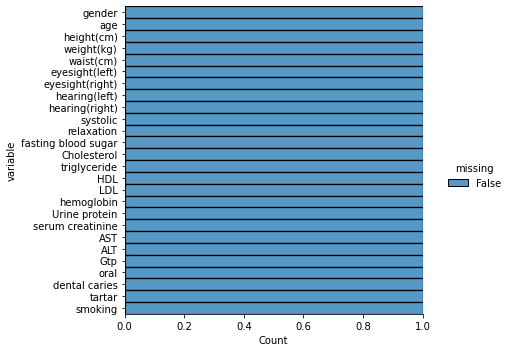

In [46]:
plt.figure(figsize=(20,6))
sns.displot(
    data=smokingDf.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig('NAEntries.png')

## Check the percentage of men & women and smokers & non-smokers in the dataset

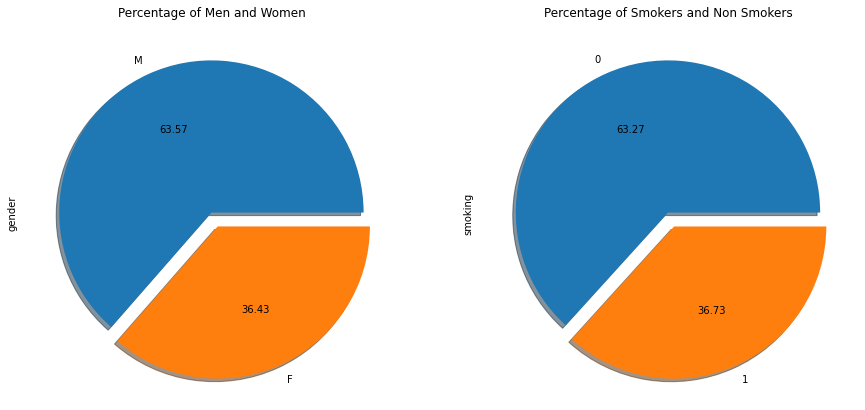

In [47]:
fig,axes = plt.subplots(1,2,figsize=(15,10))
smokingDf['gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f',shadow=True,title = 'Percentage of Men and Women',ax=axes[0])
smokingDf['smoking'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f',shadow=True,title = 'Percentage of Smokers and Non Smokers',ax=axes[1])
plt.savefig('DataPercentage.png')

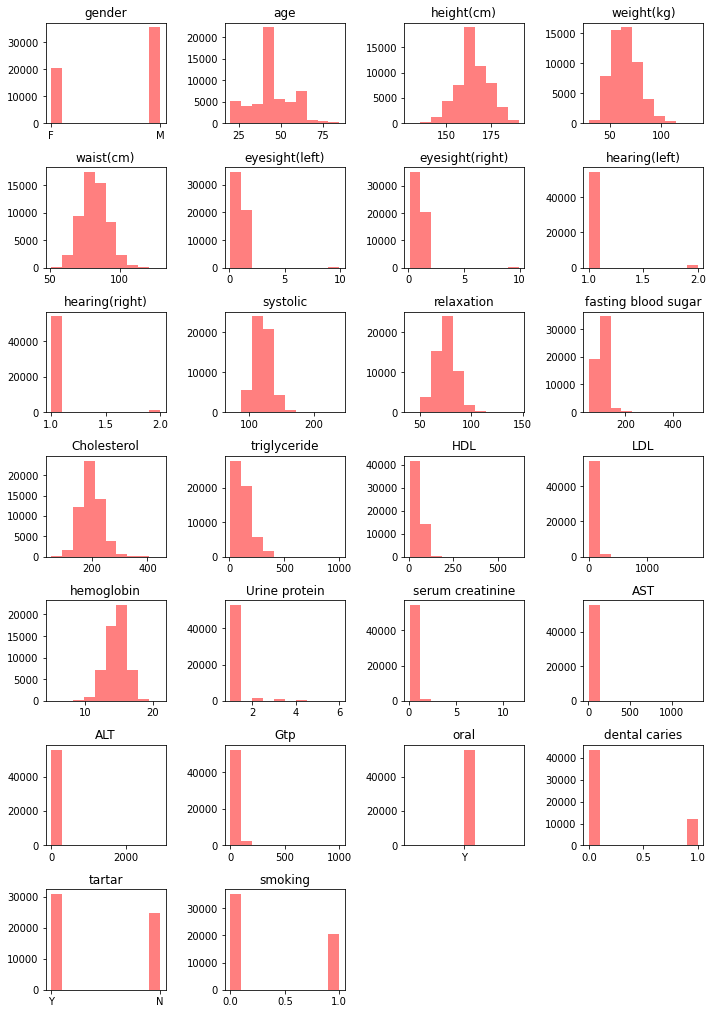

In [48]:
num_list = list(smokingDf.columns)

fig = plt.figure(figsize=(10,30))

for i in range(len(num_list)):
    plt.subplot(15,4,i+1)
    plt.title(num_list[i])
    plt.hist(smokingDf[num_list[i]],color='red',alpha=0.5)

plt.tight_layout()
plt.savefig('outliers.png')

* There are a few outliers in the dataset so we will try to do feature enginerring and get only the values which are below 99.5% population for each column

In [49]:
num_list3=['eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'triglyceride', 'HDL', 'LDL', 'Urine protein','systolic','relaxation','fasting blood sugar',
       'serum creatinine', 'AST', 'ALT', 'Gtp']

for i in range(len(num_list3)):
    print(smokingDf[num_list3[i]].quantile(0.995))
    smokingDf = smokingDf[smokingDf[num_list3[i]]<smokingDf[num_list3[i]].quantile(0.995)]
    
smokingDf

2.0
2.0
2.0
2.0
381.0
106.0
217.0
4.0
164.0
102.0
217.48500000000058
1.4
101.0
120.0
281.2300000000032


,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
5,M,30,180,75,85.0,1.2,1.2,1.0,1.0,128.0,...,16.2,1.0,1.2,18.0,27.0,33.0,Y,0,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,F,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,F,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,F,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,M,60,165,60,78.0,0.8,1.0,1.0,1.0,133.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0


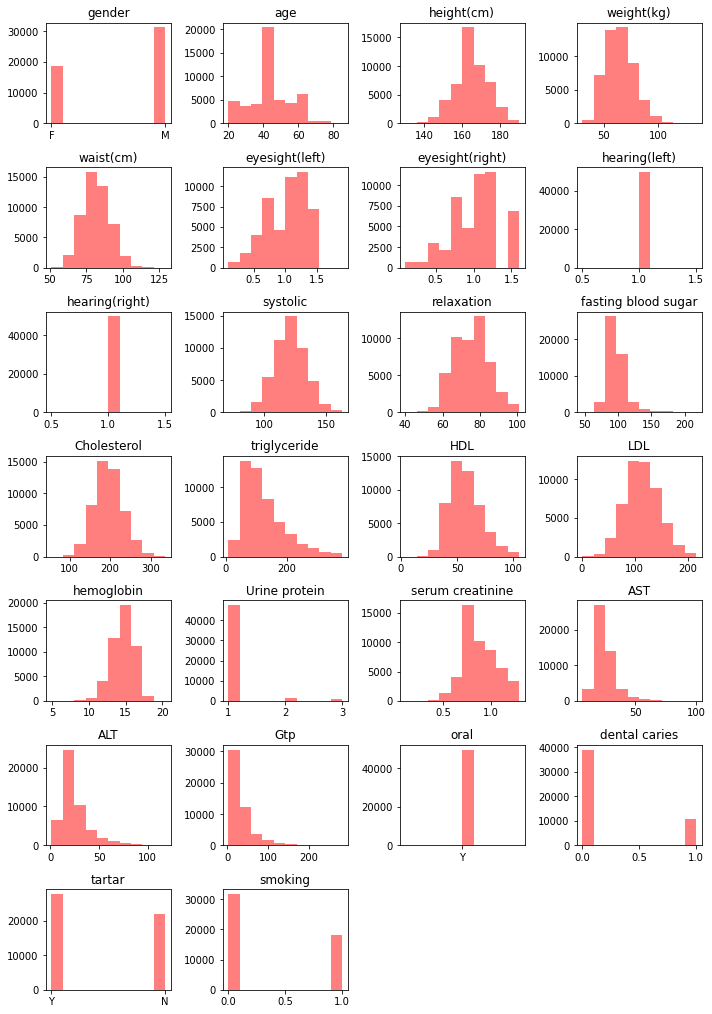

In [50]:
num_list = list(smokingDf.columns)

fig = plt.figure(figsize=(10,30))

for i in range(len(num_list)):
    plt.subplot(15,4,i+1)
    plt.title(num_list[i])
    plt.hist(smokingDf[num_list[i]],color='red',alpha=0.5)

plt.tight_layout()
plt.savefig('outliersAfter.png')

[1.]
[1.]


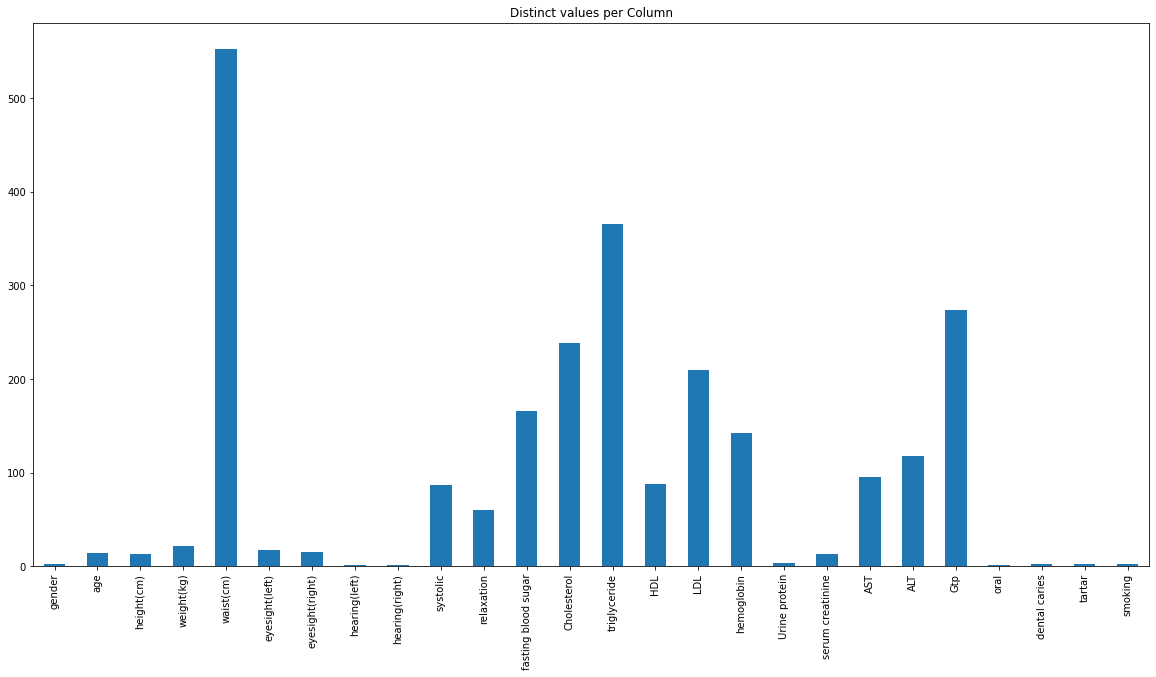

In [51]:
print(smokingDf['hearing(right)'].unique())
print(smokingDf['hearing(left)'].unique())

smokingDf.nunique().plot(kind="bar",title='Distinct values per Column',figsize=(20,10))
plt.savefig('Unique Counts.png')

In [52]:
# We can remove these columns from the dataset since they dont contribute anything to the model
smokingDf = smokingDf.drop(['hearing(left)','hearing(right)','oral'],axis=1)

In [53]:
## Checking mean height, age and weight of smokers
avgMean = smokingDf.groupby(['smoking','gender'])[['age','height(cm)','weight(kg)']].mean()
avgMean

age  height(cm)  weight(kg)
smoking gender                                   
0       F       48.419837  155.765004   56.103691
        M       40.702326  169.802504   71.172809
1       F       46.158228  156.816456   56.367089
        M       40.741785  170.170398   71.559465

In [54]:
smokingDf.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,49705.000000,49705.000000,49705.000000,49705.000000,49705.000000,49705.000000,49705.000000,49705.000000,49705.000000,49705.000000,...,49705.000000,49705.000000,49705.000000,49705.000000,49705.000000,49705.000000,49705.000000,49705.000000,49705.000000,49705.000000
mean,43.557892,164.711900,65.691480,81.734874,0.998057,0.993437,120.684499,75.513912,97.796379,196.025571,...,57.247883,114.238447,14.597000,1.061624,0.877618,24.749904,25.166522,35.716668,0.212755,0.361835
std,11.670040,9.191005,12.668297,9.167035,0.313069,0.311443,12.813411,9.098015,15.790207,34.831317,...,13.862002,32.091393,1.565465,0.296794,0.182601,9.239571,15.626212,32.447885,0.409260,0.480536
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,71.000000,40.000000,46.000000,55.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,3.000000,0.000000,0.000000
25%,35.000000,160.000000,55.000000,75.100000,0.800000,0.800000,111.000000,70.000000,89.000000,172.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,81.500000,1.000000,1.000000,120.000000,76.000000,95.000000,194.000000,...,56.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,50.000000,170.000000,75.000000,88.000000,1.200000,1.200000,130.000000,81.000000,103.000000,219.000000,...,66.000000,135.000000,15.700000,1.000000,1.000000,28.000000,30.000000,41.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,1.900000,1.600000,163.000000,101.000000,217.000000,336.000000,...,105.000000,216.000000,20.400000,3.000000,1.300000,100.000000,118.000000,281.000000,1.000000,1.000000


### Men are smoking at a younger age than women. We can think of it as men try to cope up with the stress from smoking at a much younger age than women.

<AxesSubplot:xlabel='smoking,gender'>

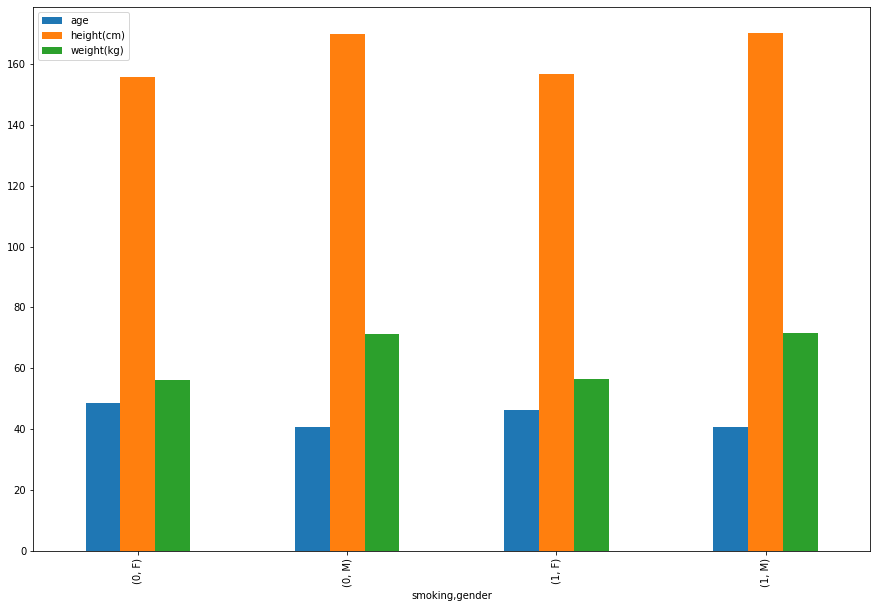

In [55]:
avgMean.plot(kind="bar",figsize=(15,10))

### Let's plot the correlation matrix for all the variables to get an idea of how the variables are related to each other

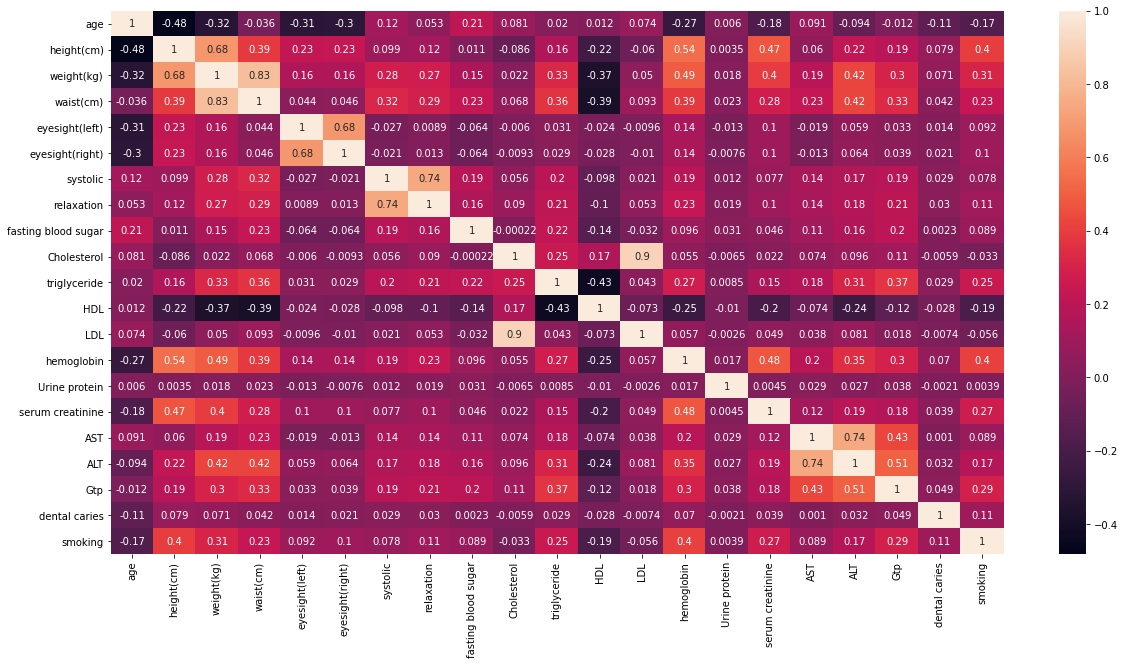

In [56]:
plt.figure(figsize=(20,10))
sns.heatmap(smokingDf.corr(),annot=True)
plt.savefig('Correlation.png')

#### The above graph tells us that height and hemoglobin are the most correlated features with smoking. Weight, waist size,serum creatininea and Gtp are loosely correlated

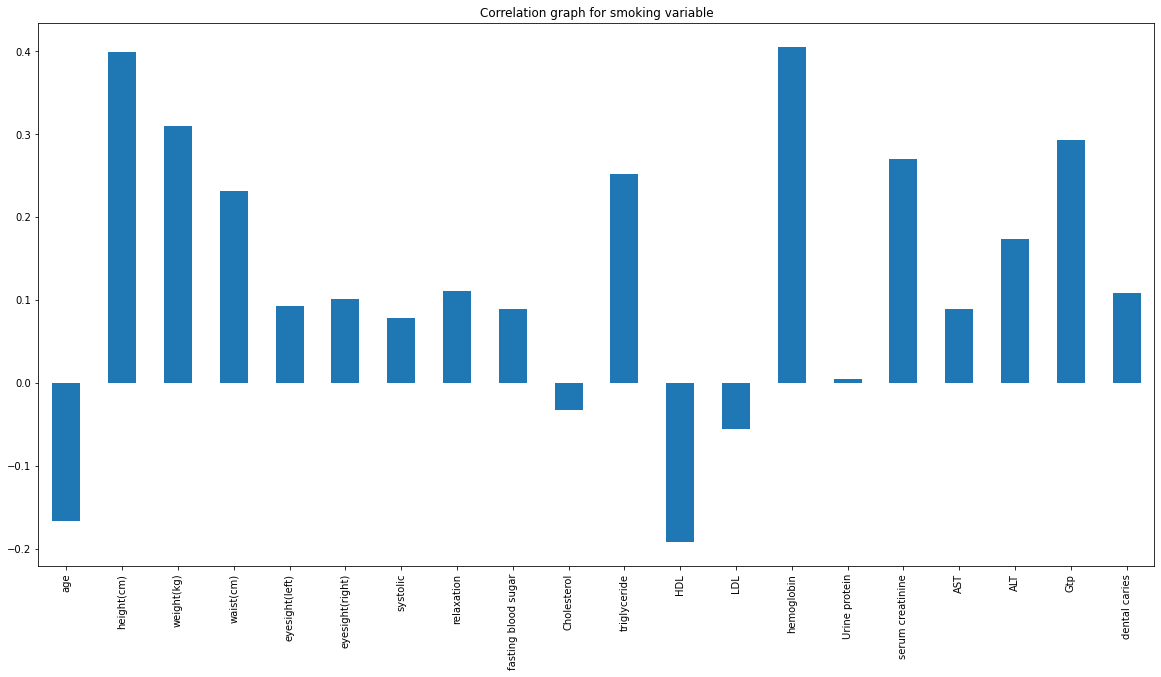

In [57]:
smokingDf.corr().loc['smoking',:'dental caries'].plot(kind="bar",figsize=(20,10),title="Correlation graph for smoking variable")
plt.savefig('smoking correlation.png')

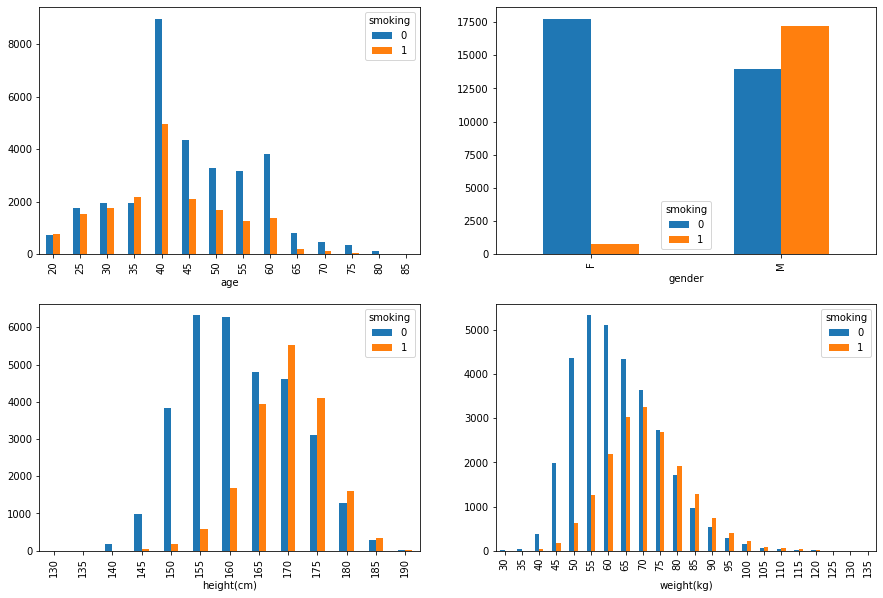

In [58]:
fig,axes=plt.subplots(2,2,figsize=(15,10))
pd.crosstab(smokingDf['age'],smokingDf['smoking']).plot(kind="bar",ax=axes[0,0])
pd.crosstab(smokingDf['gender'],smokingDf['smoking']).plot(kind="bar",ax=axes[0,1])
pd.crosstab(smokingDf['height(cm)'],smokingDf['smoking']).plot(kind="bar",ax=axes[1,0])
pd.crosstab(smokingDf['weight(kg)'],smokingDf['smoking']).plot(kind="bar",ax=axes[1,1])
plt.savefig('Distribution.png')

* One interesting point to note is that smoking tends to be less in all age categories except the 35 age category where there are more smokers. This could be due to more stress with regards to childcare, jobs and household duites at that age

* We see that percentage of women smokers are pretty less compared to men. From this dataset, we can say that men are more prone to smoking than women

* The weight category seems to follow a normal distribution with more smokers being in the 65-75 kg categories 


### Let's look at division by gender 

* Men tend to start smoking much earlier and the average age of smoking also tends to be much lower. 

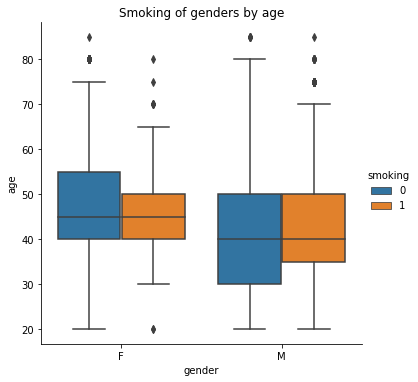

In [59]:
sns.catplot(x='gender',y='age',data=smokingDf,hue='smoking',kind="box")
plt.title('Smoking of genders by age')
plt.savefig('gendersmoking.png')

### How does Blood pressure indicate smoking status?

In [60]:
systolicDf = smokingDf.copy()
relaxationDf = smokingDf.copy()
systolicDf['systolicBins'] = pd.cut(x=smokingDf['systolic'],bins=[60,80,100,120,140,160,180,200,220,240,260])
relaxationDf['relaxationBins'] = pd.cut(x=smokingDf['relaxation'],bins=[40,60,80,100,120,140,160,180,200,220,240,260],include_lowest=True)


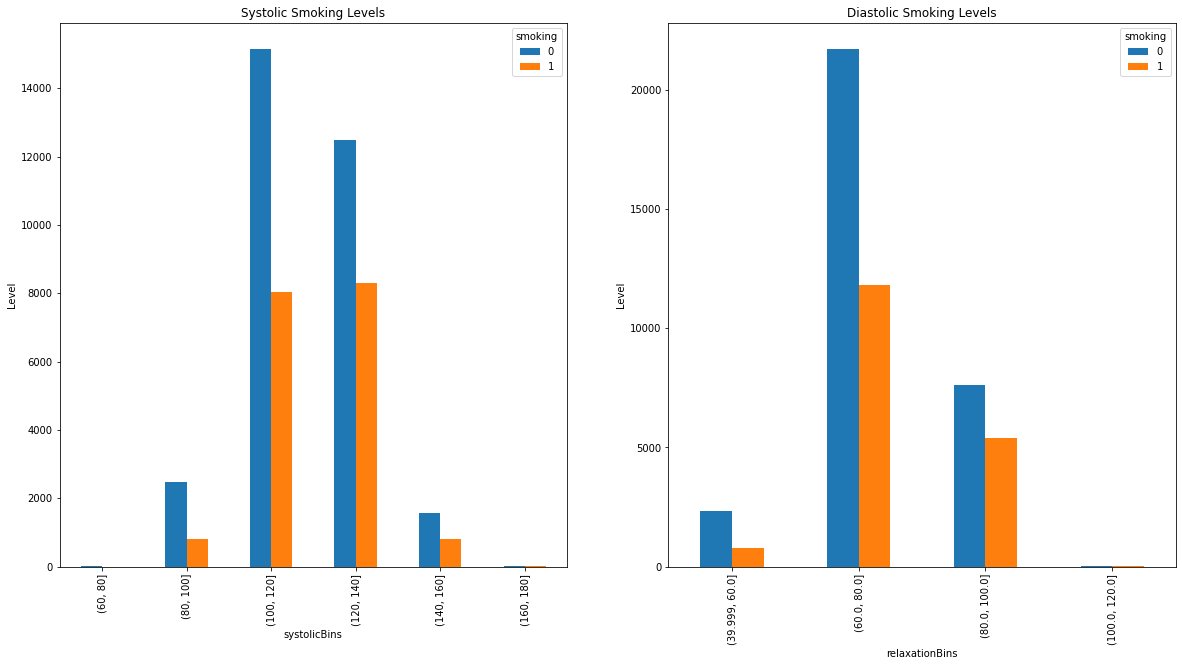

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
pd.crosstab(systolicDf['systolicBins'],systolicDf['smoking']).plot(kind="bar",ax=axes[0],ylabel='Level',title='Systolic Smoking Levels')
pd.crosstab(relaxationDf['relaxationBins'],relaxationDf['smoking']).plot(kind="bar",ax=axes[1],ylabel='Level',title='Diastolic Smoking Levels')
plt.savefig('Bp.png')

* Elevated BP generally results from systolic pressure above 120 and relaxation pressure less than 80. We see above that most smokers tend to have elevated BP pressure
* High BP comes when the relaxation pressure exceeds 80. We do have a lot of cases where that happens. 

**So we would say that High and Elevated BP are factros of smoking and if we can meditate, exercise, or eat healthy to reduce our blood pressure, we would be able to quit smoking**

### How does Hemoglobin indicate smoking status?

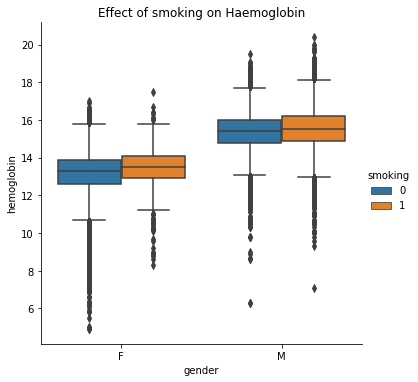

In [62]:
sns.catplot(x='gender',y='hemoglobin',data=smokingDf,hue='smoking',kind="box")
plt.title('Effect of smoking on Haemoglobin')
plt.savefig('Haemoglobin.png')

* A high hemoglobin count occurs most commonly when your body requires an increased oxygen-carrying capacity, usually because: You smoke

* The hemoglobin levels for smokers are higher than the non smokers thus indicating the above fact.
* We can look at this data and 

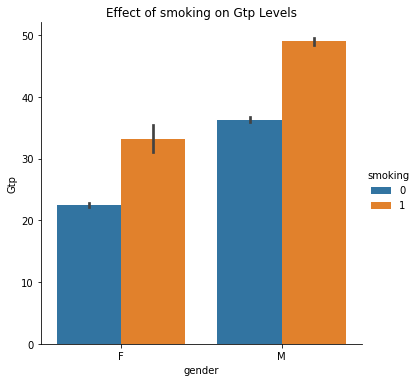

In [63]:
sns.catplot(x='gender',y='Gtp',data=smokingDf,hue='smoking',kind="bar")
plt.title('Effect of smoking on Gtp Levels')
plt.savefig('gtp.png')

* Gtp is an enzyme produced in the liver. When alcohol or smoking intake is high, or fatty liver is present, the amount of the enzyme found in the blood increases.
* The normal levels of Gtp are between  5-40. The average Gtp of men smokers is more than these levels. High levels of Gtp can be used to indicate the presence of smoking status signals. 

## Classification - Decision Trees

In [64]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(smokingDf["gender"])
smokingDf["gender"]=le.transform(smokingDf["gender"])  

# change datatype column tartar 

a = LabelEncoder()
a.fit(smokingDf["tartar"])
smokingDf["tartar"]=a.transform(smokingDf["tartar"])

smokingDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49705 entries, 0 to 55691
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               49705 non-null  int32  
 1   age                  49705 non-null  int64  
 2   height(cm)           49705 non-null  int64  
 3   weight(kg)           49705 non-null  int64  
 4   waist(cm)            49705 non-null  float64
 5   eyesight(left)       49705 non-null  float64
 6   eyesight(right)      49705 non-null  float64
 7   systolic             49705 non-null  float64
 8   relaxation           49705 non-null  float64
 9   fasting blood sugar  49705 non-null  float64
 10  Cholesterol          49705 non-null  float64
 11  triglyceride         49705 non-null  float64
 12  HDL                  49705 non-null  float64
 13  LDL                  49705 non-null  float64
 14  hemoglobin           49705 non-null  float64
 15  Urine protein        49705 non-null 

In [65]:
smokingDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49705 entries, 0 to 55691
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               49705 non-null  int32  
 1   age                  49705 non-null  int64  
 2   height(cm)           49705 non-null  int64  
 3   weight(kg)           49705 non-null  int64  
 4   waist(cm)            49705 non-null  float64
 5   eyesight(left)       49705 non-null  float64
 6   eyesight(right)      49705 non-null  float64
 7   systolic             49705 non-null  float64
 8   relaxation           49705 non-null  float64
 9   fasting blood sugar  49705 non-null  float64
 10  Cholesterol          49705 non-null  float64
 11  triglyceride         49705 non-null  float64
 12  HDL                  49705 non-null  float64
 13  LDL                  49705 non-null  float64
 14  hemoglobin           49705 non-null  float64
 15  Urine protein        49705 non-null 

### Feature Selection

* We'll select the best features for prediction for the decision tree

In [91]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import metrics
from sklearn.model_selection import train_test_split

feature_train = smokingDf.iloc[:,0:22].copy()
feature_test = smokingDf['smoking'].copy()
feature_train.columns

Index(['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'systolic', 'relaxation',
       'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL',
       'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp',
       'dental caries', 'tartar'],
      dtype='object')

In [67]:
ordered_ranks = SelectKBest(score_func=chi2,k=10)
ordered_features = ordered_ranks.fit(feature_train,feature_test)
cols = ordered_features.get_support(indices=True)
featureDf = pd.DataFrame(list(ordered_features.scores_),columns=['Scores'])
featureColumnsDf=pd.DataFrame(feature_train.columns,columns=['Columns'])

                Columns         Scores
0                gender    4863.684531
1                   age    4300.699200
2            height(cm)    4061.183344
3            weight(kg)   11603.365852
4             waist(cm)    2746.449874
5        eyesight(left)      41.653086
6       eyesight(right)      49.772233
7              systolic     415.643420
8            relaxation     661.284503
9   fasting blood sugar    1009.104716
10          Cholesterol     339.166904
11         triglyceride  117540.717291
12                  HDL    6126.820942
13                  LDL    1390.492722
14           hemoglobin    1365.393213
15        Urine protein       0.062971
16     serum creatinine     137.121328
17                  AST    1344.509900
18                  ALT   14509.520316
19                  Gtp  125338.365761
20        dental caries     458.053652
21               tartar     210.267854


['Gtp',
 'triglyceride',
 'ALT',
 'weight(kg)',
 'HDL',
 'gender',
 'age',
 'height(cm)',
 'waist(cm)',
 'LDL']

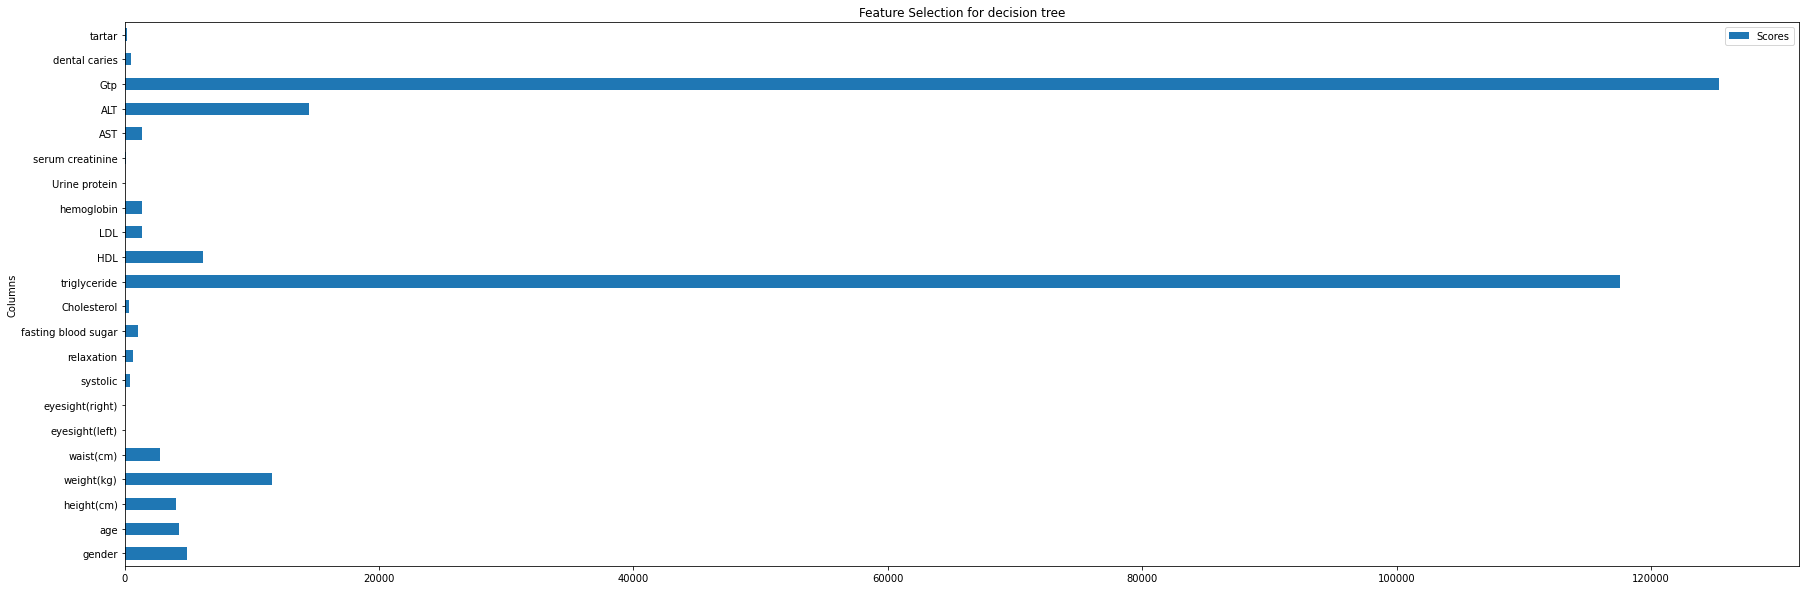

In [68]:
scoreDf = pd.concat([featureColumnsDf,featureDf],axis=1)
#scoreDf.plot(kind='box')
scoreDf.plot.barh(x='Columns',y='Scores',figsize=(30,10),title='Feature Selection for decision tree')
print(scoreDf)
bestColumnList = list(scoreDf.sort_values(by='Scores',ascending=False)[:10].iloc[:,0])
bestColumnList

In [92]:
x = feature_train.loc[:,bestColumnList].copy()           
y = smokingDf["smoking"]    # y = quality

# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)
x.columns

X Train :  (37278, 10)
X Test  :  (12427, 10)
Y Train :  (37278,)
Y Test  :  (12427,)


Index(['Gtp', 'triglyceride', 'ALT', 'weight(kg)', 'HDL', 'gender', 'age',
       'height(cm)', 'waist(cm)', 'LDL'],
      dtype='object')

In [70]:
treeList=[]

In [71]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn import tree
accuracy_score=[]
tree_list=[]
# Create the folds in the training data
kfold = StratifiedKFold(n_splits=3, shuffle=True)

# Iterate over max_depth
for max_depth in range(1,31):
    model3 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    scores = cross_val_score(model3, X_train, y_train, cv=kfold)
    accuracy_score.append(scores.mean()*100)
    tree_list.append(max_depth)
    print('max_depth={} scores={} avg_score={}'.format(max_depth, scores, scores.mean()))



max_depth=1 scores=[0.7040882  0.70336391 0.70553678] avg_score=0.7043296314179944
max_depth=2 scores=[0.72855303 0.73249638 0.72742636] avg_score=0.7294919255324857
max_depth=3 scores=[0.72589731 0.73136971 0.73491067] avg_score=0.7307258973120877
max_depth=4 scores=[0.73893449 0.74070497 0.73635925] avg_score=0.7386662374590912
max_depth=5 scores=[0.74400451 0.74070497 0.74352165] avg_score=0.7427437094264714
max_depth=6 scores=[0.74150974 0.73917592 0.74440689] avg_score=0.7416975159611567
max_depth=7 scores=[0.74295831 0.74239498 0.73812973] avg_score=0.7411610064917645
max_depth=8 scores=[0.73587639 0.74014164 0.74279736] avg_score=0.7396051290305273
max_depth=9 scores=[0.74038307 0.7522131  0.74545308] avg_score=0.7460164171897633
max_depth=10 scores=[0.73941735 0.7351521  0.74207307] avg_score=0.738880841246848
max_depth=11 scores=[0.7409464  0.73949783 0.7382102 ] avg_score=0.7395514780835882
max_depth=12 scores=[0.7324159  0.73571544 0.74424594] avg_score=0.7374590911529589
ma

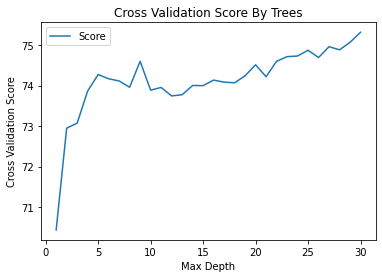

In [72]:
accuracyDf = pd.DataFrame(accuracy_score,index=tree_list,columns=['Score'])
accuracyDf = accuracyDf.reset_index().rename(columns={'index':'Number of Trees'})
accuracyDf.plot.line(x='Number of Trees',y='Score',ylabel='Cross Validation Score',xlabel='Max Depth',title='Cross Validation Score By Trees')
plt.savefig('Cross Validatoin Score.png')

In [73]:
model20 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=29)
result20 = model20.fit(X_train, y_train)

In [74]:
prediction = result20.predict(X_train)
metrics.accuracy_score(y_train,prediction)

0.9978539621224315

In [75]:
prediction20 = result20.predict(X_test)
metrics.accuracy_score(y_test,prediction20)

0.7799147018588557

* There is inconsitency with our training and test dataset possibly due to overfitting due to larger tree size. We will look to resolve this by reducing the number of trees and checking

In [81]:
model5 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=8)
result5 = model5.fit(X_train, y_train)


In [82]:
#Consistent with test set
prediction = result5.predict(X_train)
metrics.accuracy_score(y_train,prediction)

0.7631578947368421

In [83]:
prediction = result5.predict(X_test)
metrics.accuracy_score(y_test,prediction)


0.7440251066226764

* The above is consistent with test set

Get important features for the model

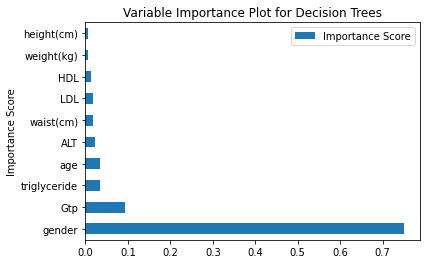

In [84]:
feature_importanceDf = pd.DataFrame(model5.feature_importances_,index = X_train.columns,columns=['Importance Score'])
feature_importanceDf.sort_values(by='Importance Score',ascending=False).plot(kind="barh",xlabel='Importance Score',ylabel='Variables',title='Variable Importance Plot for Decision Trees')
plt.savefig('VarPlot.png')

* Gender, Gtp and triglyceride are the most importanct features

In [85]:
import graphviz


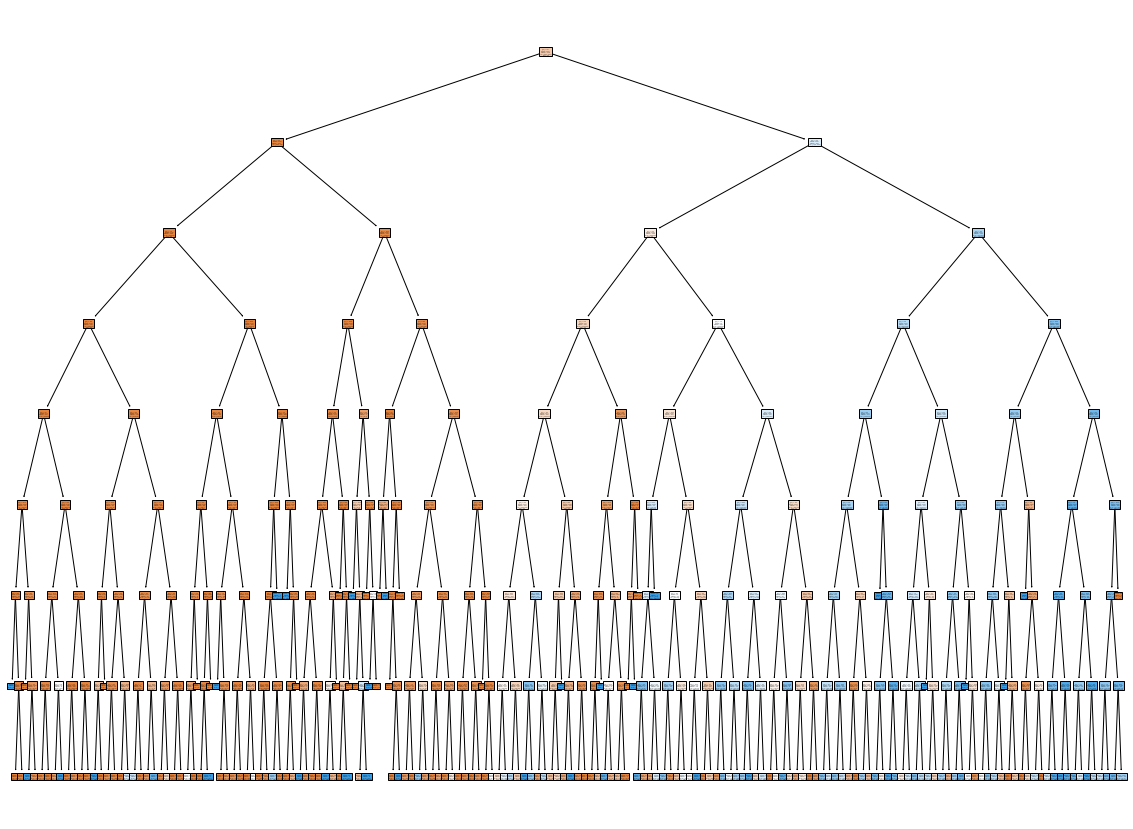

In [86]:
fig = plt.figure(figsize=(20,15))
tree_dc = tree.plot_tree(model5, 
                   feature_names=None,  
                   class_names=x.columns.values,
                   filled=True)
fig.savefig("decistion_tree.png")

In [88]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,prediction)
conf_matrix


array([[6244, 1783],
       [1398, 3002]], dtype=int64)

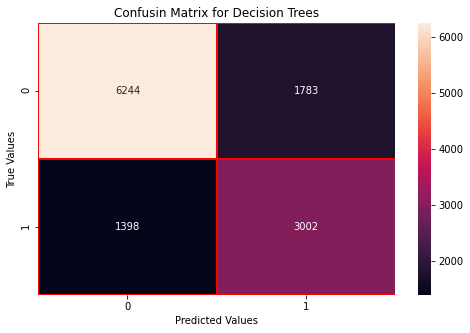

In [90]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(conf_matrix,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title('Confusin Matrix for Decision Trees')
plt.show()